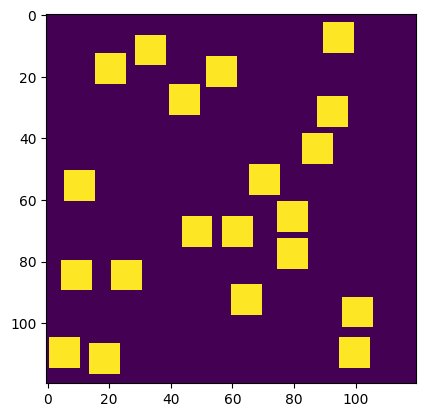

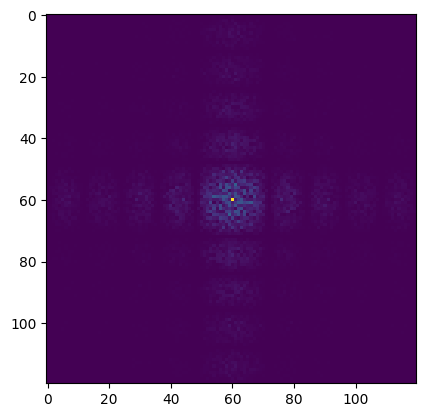

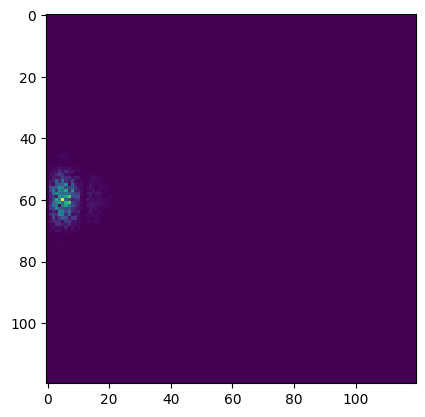

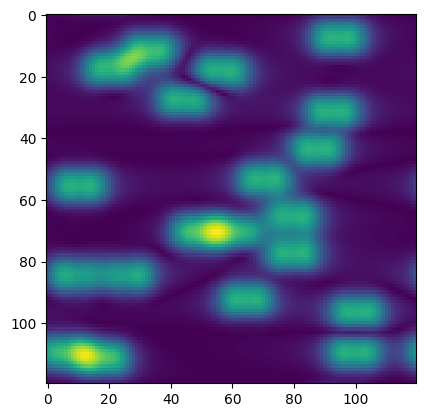

In [6]:
import numpy as np 
import pylab
# image size, square side length, number of squares 
ncols, nrows = 120, 120 
sq_size, nsq= 10, 20
# The image array (0=background, 1=square) and boolean array of allowed places 
# to add a square so that it doesn’t touch another or the image sides
image = np.zeros((nrows, ncols)) 
sq_locs = np.zeros((nrows, ncols), dtype=bool) 
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True 

def place_square():
    """ Place a square at random on the image and update sq_locs. """ 
    # valid_locs is an array of the indexes of True entries in sq_locs 
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] =1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1) 
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False 
    
# Add the required number of squares to the image
for i in range(nsq):
    place_square()
    pylab.imshow(image)
    
pylab.show()
# Take the two-dimensional DFT and center the frequencies 
ftimage = np.fft.fft2(image) 
ftimage = np.fft.fftshift(ftimage) 
pylab.imshow(np.abs(ftimage))
pylab.show()
# Build and apply a Gaussian filter.
sigmax, sigmay = 10, 10 
cy, cx = nrows/2, ncols/2 
x = np.linspace(0, nrows, nrows) 
y = np.linspace(0, ncols, ncols) 
X, Y = np.meshgrid(x, y) 
gmask = np.exp(-(((X)/ sigmax)**2 + ((Y-cy)/sigmay)**2)) 
ftimagep = ftimage * gmask 
pylab.imshow(np.abs(ftimagep))
pylab.show()
# Finally, take the inverse transform and show the blurred image 
imagep = np.fft.ifft2(ftimagep)
pylab.imshow(np.abs(imagep)) 
pylab.show()